# Importação e Exploração da Base de Dados

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [5]:
df.shape

(133349, 11)

In [6]:
linhas, colunas = df.shape[0],df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
columns_translation = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df_pt = df.rename(columns=columns_translation)
print(df_pt.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [9]:
df_pt["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [10]:
df_pt["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [11]:
df_pt["remoto"].value_counts()
# 0 = Trabalhos presenciais
# 100 =  Remoto
# 50 Híbridas

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [12]:
df_pt["tamanho_empresa"].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [13]:
senioridade_translation = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}
df_pt['senioridade'] = df_pt['senioridade'].replace(senioridade_translation)
df_pt['senioridade'].value_counts()

senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64

In [14]:
contrato_translation = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}
df_pt['contrato'] = df_pt['contrato'].replace(contrato_translation)
df_pt['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

In [15]:
tamanho_empresa_translation = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}
df_pt['tamanho_empresa'] = df_pt['tamanho_empresa'].replace(tamanho_empresa_translation)
df_pt['tamanho_empresa'].value_counts()

tamanho_empresa
Médio      129561
Grande       3574
Pequeno       214
Name: count, dtype: int64

In [16]:
remoto_translation = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}
df_pt['remoto'] = df_pt['remoto'].replace(remoto_translation)
df_pt['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [17]:
df_pt.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [18]:
df_pt.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [19]:
df_pt.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Preparação e Limpeza de Dados

In [20]:
df_pt.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [21]:
df_pt.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df_pt.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [23]:
df_pt['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
df_pt[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


## Exemplos de como lidar com dados nulos

In [25]:
import numpy as np
# Criação de um DataFrame de testes
df_salarios = pd.DataFrame({
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas', 'Val'],
    'Salario' : [4000,np.nan, 5000, np.nan, 6000, 100000]
})

# Calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['Salario'].fillna(df_salarios['Salario'].mean().round(2))
# Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['Salario'].fillna(df_salarios['Salario'].median())
df_salarios


,Nome,Salario,salario_media,salario_mediana
0,João,4000.0,4000.0,4000.0
1,Maria,NaN,28750.0,5500.0
2,Pedro,5000.0,5000.0,5000.0
3,Ana,NaN,28750.0,5500.0
4,Lucas,6000.0,6000.0,6000.0
5,Val,100000.0,100000.0,100000.0


In [26]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura' : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchida_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,Preenchida_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [27]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura' : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchida_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,Preenchida_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
df_cidades = pd.DataFrame({
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas', 'Val'],
    'Cidade' : ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém', 'Rio de Janeiro']
})

df_cidades['Cidade_preenchida'] = df_cidades['Cidade'].fillna('Não informado')
df_cidades

,Nome,Cidade,Cidade_preenchida
0,João,São Paulo,São Paulo
1,Maria,NaN,Não informado
2,Pedro,Curitiba,Curitiba
3,Ana,NaN,Não informado
4,Lucas,Belém,Belém
5,Val,Rio de Janeiro,Rio de Janeiro


## Continuando a Limpezada dos dados

In [29]:
df_pt_limpo = df_pt.dropna()

In [30]:
df_pt_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [31]:
df_pt_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [32]:
df_pt_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_pt_limpo = df_pt_limpo.assign(ano = df_pt_limpo['ano'].astype('int64'))
df_pt_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Júnior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno
133347,2020,Júnior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


# Visualização de Dados

In [34]:
df_pt_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

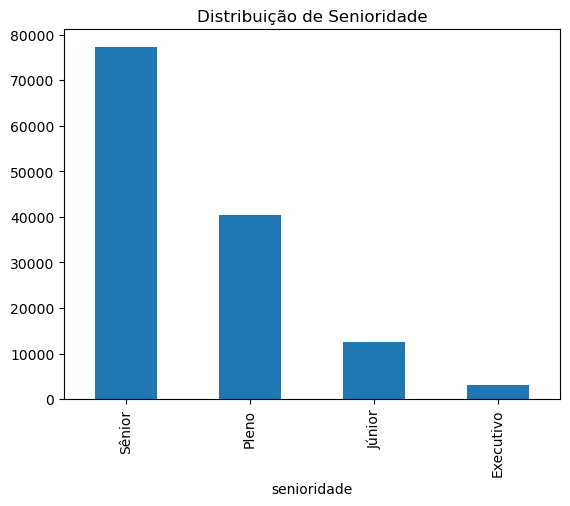

In [35]:
df_pt_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade') # Gráficos com Pandas

In [36]:
# Utilizando Matplolib e Seaborn para gráficos melhores
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

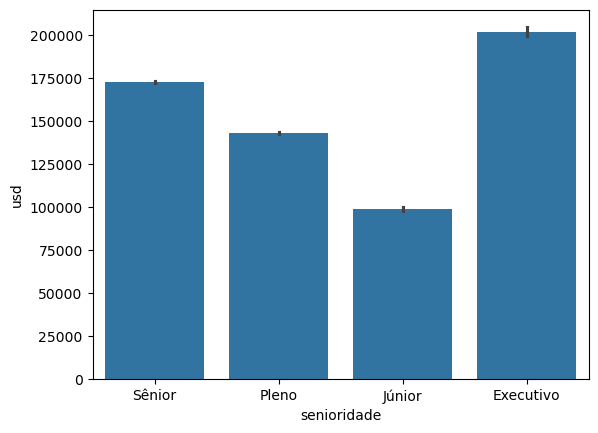

In [37]:
sns.barplot(data=df_pt_limpo, x='senioridade', y='usd')

## Formatações de Gráficos com Matplotlib

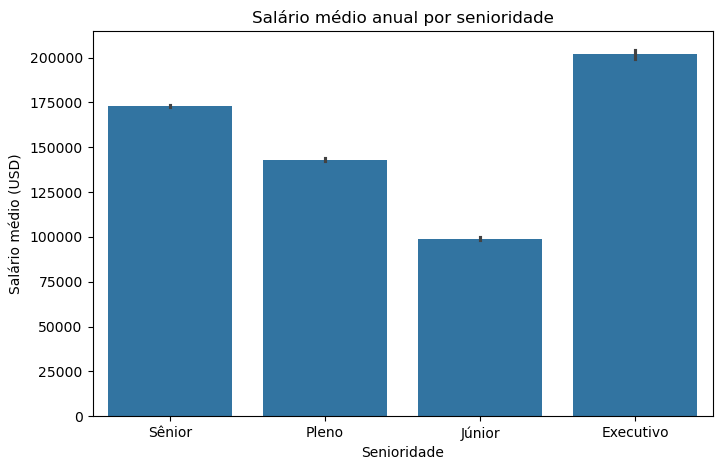

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_pt_limpo, x='senioridade', y='usd')
plt.title('Salário médio anual por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio (USD)')
plt.show()

In [39]:
# Usando group by para ordenação
df_pt_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True)

senioridade
Júnior        99034.963267
Pleno        143044.845979
Sênior       172850.838301
Executivo    202027.667813
Name: usd, dtype: float64

In [40]:
ordem_senioridade = df_pt_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem_senioridade

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

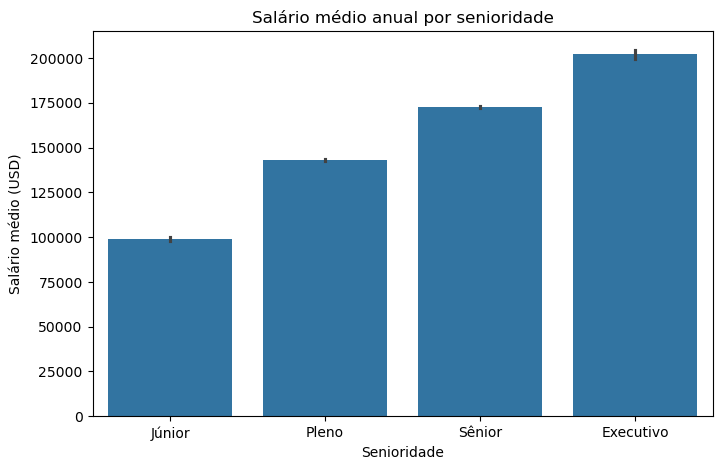

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_pt_limpo, x='senioridade', y='usd', order=ordem_senioridade)
plt.title('Salário médio anual por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio (USD)')
plt.show()

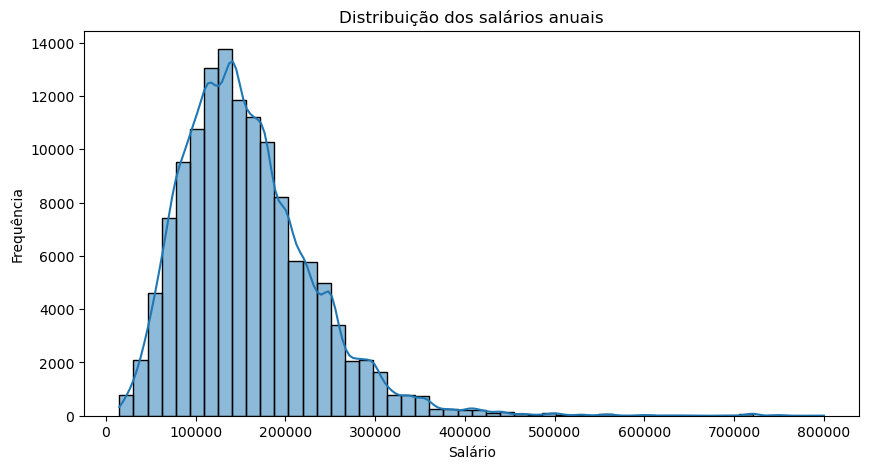

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df_pt_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

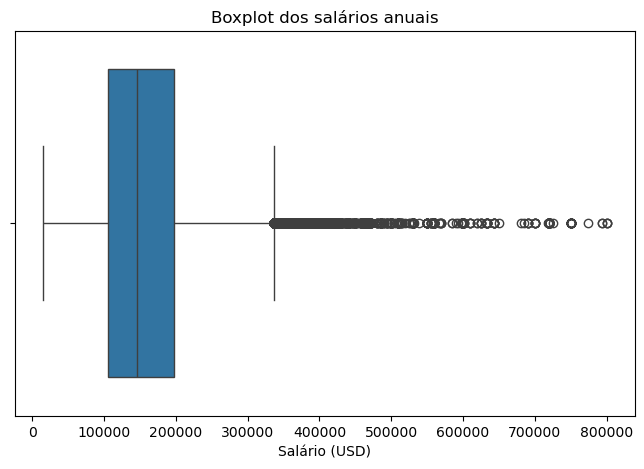

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_pt_limpo['usd'])
plt.title('Boxplot dos salários anuais')
plt.xlabel('Salário (USD)')
plt.show()

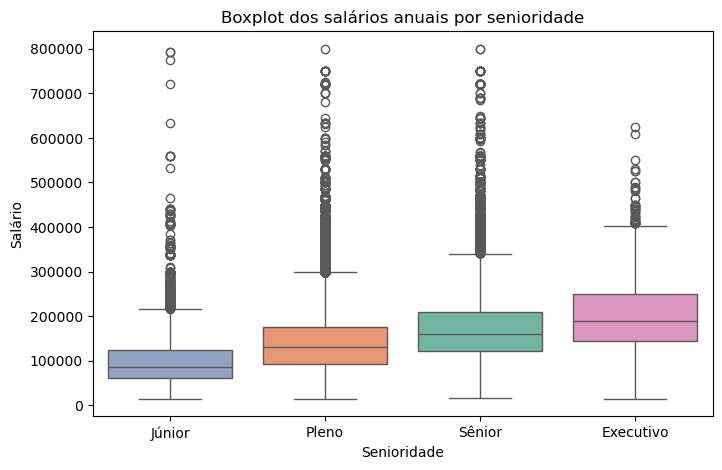

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_pt_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot dos salários anuais por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário')
plt.show()

## Gráficos Interativos

In [45]:
import plotly.express as px

In [46]:
# Agrupando os dados para calcular a média salarial por senioridade
df_media_senioridade = df_pt_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Criando o gráfico de barras interativo
fig = px.bar(df_media_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade (USD)',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial (USD)'},
             category_orders={'senioridade': ['Júnior', 'Pleno', 'Sênior', 'Executivo']},
             color='senioridade',
             color_discrete_sequence=px.colors.qualitative.Safe)

# Exibindo o gráfico
fig.show()

In [47]:
remoto_contagem = df_pt_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values ='quantidade',
             title='Proporção dos Tipos de Trabalho',
             hole=0.5,
             color='tipo_trabalho',
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_traces(textinfo='percent+label')
fig.show()

In [48]:
# Filtrando apenas para cargos de Data Scientist
df_data_scientist = df_pt_limpo[df_pt_limpo['cargo'] == 'Data Scientist']

# Calculando a média salarial por país da empresa (empresa) para Data Scientists
df_media_pais = df_data_scientist.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

# Criando o gráfico de barras para os top 15 países
fig = px.bar(df_media_pais.head(15),
             x='empresa',
             y='usd',
             title='Top 15 Países com Maior Média Salarial para Data Scientists (USD)',
             labels={'empresa': 'País da Empresa', 'usd': 'Média Salarial (USD)'},
             color='usd',
             color_continuous_scale=px.colors.sequential.Cividis)

fig.show()

In [49]:
df_pt_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [50]:
pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/6.3 MB 3.1 MB/s eta 0:00:02
   -------------- ------------------------- 2.4/6.3 MB 4.9 MB/s eta 0:00:01
   ------------------------ --------------- 3.9/6.3 MB 5.8 MB/s eta 0:00:01
   ------------------------------------ --- 5.8/6.3 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 6.4 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [51]:

import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_pt_limpo['residencia_iso3'] = df_pt_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_pt_limpo[df_pt_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [52]:
df_pt_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [53]:
df_pt_limpo.to_csv('dados-imersao-final.csv', index=False)